Integrantes:

- Gustavo Acuña
- Benjamin Perez
- Eduardo Poblete

#1) Business Understanding

El negocio presente en este caso trata del banco conocido como Monopoly, el cual lleva muchos años atendiendo a sus clientes en Chile y que recientemente fue adquirido por un banco el cual tiene capitales extranjeros conocido como Dormammu. Se ha solicitado el hacer estudios sobre los clientes del banco Monopoly, con la finalidad de estudiar el comportamiento y detectar patrones, además de analizar cómo será la estrategia para abordar a estos nuevos clientes. De esta manera se ha extraído una base de datos, la cual contiene una muestra de clientes con 12 meses de información almacenada en variables mensuales por cada cliente. Estos datos deben ser analizados y limpiados, además de seleccionar variables las cuales sirvan para realizar una interpretación y entregar la mayor información posible a los dueños del banco, para que estos puedan conocer mejor a los clientes, junto con preparar una estrategia y abordar este nuevo mercado.

#2) Data Understanding

## 2.1 Preparación del entorno de desarrollo

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import VarianceThreshold
#encoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
#fin encoder
%matplotlib inline
sns.set(color_codes=True)

Importaciones a utilizar.

In [ ]:
#instanciar ruta del archivo
path = 'Base_clientes_Monopoly.xlsx'
#Leer los datos del excel
clientes_monopoly = pd.read_excel(path, header = 1)
#imprimir los datos
clientes_monopoly.head(10)

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,CambioPin,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX,FlgAct_T12,FlgActCN_T12,FlgActCI_T12,FlgActAN_T12,FlgActAI_T12,FlgActPAT_T12,FlgActCCPC_T12,FlgActCCOT_T12,FlgActCOL_T12,Fac_T12,Txs_T12,FacCN_T12,TxsCN_T12,FacCI_T12,TxsCI_T12,FacAN_T12,TxsAN_T12,FacAI_T12,TxsAI_T12,...,FlgActCOL_T01,Fac_T01,Txs_T01,FacCN_T01,TxsCN_T01,FacCI_T01,TxsCI_T01,FacAN_T01,TxsAN_T01,FacAI_T01,TxsAI_T01,FacPAT_T01,TxsPAT_T01,FacCCPC_T01,TxsCCPC_T01,FacCCOT_T01,TxsCCOT_T01,FacCOL_T01,TxsCOL_T01,FacDebCom_T01,TxsDebCom_T01,FacDebAtm_T01,TxsDebAtm_T01,Col_T01,ColL1T0_T01,ColL1TE_T01,ColL2T0_T01,ColL2AC_T01,ColL2CC_T01,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,Unnamed: 574
0,1,160,M,13.0,43,NaN,130,1,1,0,0,1,0,0,1,NaN,1,3,798000,1012000.0,1210.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,55490.0,3.0,55490.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,204133,28,24000,2,1069735.0,0,1040339.0,0,0,29396,0.0,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0,NaN
1,2,160,H,13.0,46,143640.0,69,1,0,0,0,1,0,1,0,NaN,1,1,750000,150000.0,1000.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19813.0,1.0,19813.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,118247,1,118247,1,0,0,0,0,0,0,0,0,118247,1,0,0,0,0,0,0,0,0,211884.0,0,162939.0,48945,0,0,0.0,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0,NaN
2,3,170,H,13.0,45,929106.0,24,1,1,0,0,1,0,1,1,1.0,1,2,1350000,200000.0,1500.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123950.0,3.0,123950.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,191336,3,191336,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,162161,9,519000,11,7400.0,7400,0.0,0,0,0,0.0,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0,NaN
3,4,151,H,13.0,46,172447.0,134,0,1,0,1,0,0,0,0,1.0,1,2,1570800,220001.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,44470.0,3.0,44470.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,11890,1,11890,1,0,0,0,0,0,0,0,0,11890,1,0,0,0,0,0,0,0,0,262160.0,0,244048.0,18112,0,0,0.0,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0,NaN
4,5,170,H,13.0,46,805250.0,116,0,1,1,0,1,0,1,0,1.0,2,3,2762000,2.0,6430.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,138225.0,6.0,138225.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,173576,10,173576,10,0,0,0,0,0,0,0,0,70808,3,47000,1,0,0,0,0,0,0,306161.0,60008,0.0,214125,0,32028,0.0,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0,NaN
5,6,170,H,13.0,47,707664.0,67,1,1,0,0,1,0,0,1,1.0,1,2,1312500,450000.0,714.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,134990.0,2.0,134990.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,21480,2,21480,2,0,0,0,0,0,0,0,0,14900,1,0,0,0,0,0,0,314000,4,39567.0,0,0.0,39567,0,0,0.0,35800,0.0,35800.0,0.0,0.0,51197,0.0,R,0,NaN
6,7,811,H,13.0,48,1022833.0,21,1,0,1,0,1,0,0,1,1.0,2,2,813000,160000.0,600.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,241750.0,26.0,233571.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,8353,1,0,0,0,0,0,0,0,0,8353,1,0,0,0,0,0,0,0,0,0,0,8353.0,8353,0.0,0,0,0,0.0,9391,0.0,8818.0,0.0,8818.0,0,0.0,T,0,NaN
7,8,170,H,13.0,46,NaN,69,0,1,1,0,1,0,0,1,NaN,2,3,1242000,1738000.0,1255.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45270.0,1.0,45270.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,33880,1,33880,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,198000,14,274600.0,57350,195830.0,21420,0,0,0.0,6000,0.0,283520.0,0.0,283520.0,0,0.0,R,0,NaN
8,9,170,H,13.0,49,1171066.0,33,0,0,0,0,1,0,0,1,1.0,1,1,1996400,1.0,2000.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23980.0,1.0,23980.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,747201,10,486539.0,0,479539.0,0,0,7000,0.0,60000,0.0,507629.0,0.0,507629.0,0,0.0,R,1,NaN
9,10,170,M,13.0,44,964387.0,23,1,1,0,0,1,0,1,1,1.0,1,3,672000,3500000.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,23300,1,23300,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7613,1,17000,1,77106.0,45300,0.0,31806,0,0,0.0,92583,0.0,65487.0,0.0,65487.0,12084,0.0,R,0,NaN


Aquí realmente lo único importante a destacar, es que se usó la función clientes_monopoly.head(10) para poder verificar que los datos se cargaron de forma correcta. En este caso, también se solicitaron 10 filas a observar inicialmente para comprobar que todos los datos se encuentren presentes, y se consideró una cantidad apropiada para esta observación.

##2.2 Análisis de los atributos del conjunto de datos y sus dimensiones.

In [ ]:
#Numero total de columnas y filas
clientes_monopoly.shape

(51124, 575)

In [ ]:
clientes_monopoly.dtypes

Id                int64
Subsegmento       int64
Sexo             object
Region          float64
Edad              int64
                 ...   
UsoL2_T01         int64
UsoLI_T01       float64
IndRev_T01       object
target            int64
Unnamed: 574    float64
Length: 575, dtype: object

In [ ]:
clientes_monopoly.columns

Index(['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad',
       'Internauta', 'Adicional', 'Dualidad',
       ...
       'PagoNac_T01', 'PagoInt_T01', 'EeccNac_T01', 'EeccInt_T01', 'UsoL1_T01',
       'UsoL2_T01', 'UsoLI_T01', 'IndRev_T01', 'target', 'Unnamed: 574'],
      dtype='object', length=575)

Es importante antes de empezar a entrenar un modelo predictivo, o incluso antes de todo, realizar una exploración descriptiva de los datos. Este proceso nos permitirá entender mejor la información que contiene cada variable de la base de datos y escoger una muestra para analizar en este aprendizaje supervisado. Algunas cosas que podríamos esperar podría ser:
- Que alguna columna tenga tipos de datos erróneos.
- Datos que no correspondan al tipo señalado por la columna.
y en este caso principalmente nos dará pistas sobre qué variables son adecuadas para predecir nuestro campo puebla.

In [ ]:
clientes_monopoly.describe()

,Id,Subsegmento,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,CambioPin,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX,FlgAct_T12,FlgActCN_T12,FlgActCI_T12,FlgActAN_T12,FlgActAI_T12,FlgActPAT_T12,FlgActCCPC_T12,FlgActCCOT_T12,FlgActCOL_T12,Fac_T12,Txs_T12,FacCN_T12,TxsCN_T12,FacCI_T12,TxsCI_T12,FacAN_T12,TxsAN_T12,FacAI_T12,TxsAI_T12,FacPAT_T12,...,FlgActCCOT_T01,FlgActCOL_T01,Fac_T01,Txs_T01,FacCN_T01,TxsCN_T01,FacCI_T01,TxsCI_T01,FacAN_T01,TxsAN_T01,FacAI_T01,TxsAI_T01,FacPAT_T01,TxsPAT_T01,FacCCPC_T01,TxsCCPC_T01,FacCCOT_T01,TxsCCOT_T01,FacCOL_T01,TxsCOL_T01,FacDebCom_T01,TxsDebCom_T01,FacDebAtm_T01,TxsDebAtm_T01,Col_T01,ColL1T0_T01,ColL1TE_T01,ColL2T0_T01,ColL2AC_T01,ColL2CC_T01,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,target,Unnamed: 574
count,51124.000000,51124.000000,51071.000000,51124.000000,3.775900e+04,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,31736.0,51124.000000,51124.000000,5.112400e+04,5.112400e+04,51124.000000,42873.000000,42873.000000,42873.000000,42873.000000,42873.000000,42873.000000,42873.000000,42873.000000,42873.000000,4.287300e+04,42873.000000,4.287300e+04,42873.000000,4.287300e+04,42873.000000,4.287300e+04,42873.000000,42873.000000,42873.000000,4.287300e+04,...,51124.000000,51124.000000,5.112400e+04,51124.000000,5.112400e+04,51124.000000,5.112400e+04,51124.000000,5.112400e+04,51124.000000,5.112400e+04,51124.000000,51124.000000,51124.000000,5.112400e+04,51124.000000,5.112400e+04,51124.000000,5.112400e+04,51124.000000,5.112400e+04,51124.000000,5.112400e+04,51124.000000,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,51124.000000,5.112400e+04,5.112400e+04,51124.000000,51124.000000,0.0
mean,25562.500000,182.024274,10.828220,38.702879,6.630771e+05,38.896154,0.684199,0.256181,0.381347,0.063141,0.925260,0.000900,0.137548,0.875284,1.0,1.407206,1.732376,1.133187e+06,3.283759e+05,1400.320047,0.659156,0.582068,0.033728,0.023045,0.002612,0.139435,0.277727,0.107667,0.003172,6.732317e+04,2.586850,5.687099e+04,2.224477,4.060128e+03,0.096284,1.724188e+03,0.032095,373.337824,0.005178,4.294533e+03,...,0.104413,0.003032,7.097639e+04,2.539355,5.920637e+04,2.161411,5.069743e+03,0.119846,2.333281e+03,0.047747,4.146368e+02,0.005007,3952.363821,0.205344,2.128750e+04,0.532470,1.229411e+04,0.133773,5.258277e+03,0.003091,6.967501e+04,4.755927,2.306400e+05,5.686136,3.015690e+05,2.986573e+04,1.207488e+05,3.368847e+04,6.786262e+04,4.416549e+04,5.237914e+03,7.637553e+04,1.734930e+03,1.939488e+05,7.323155,1.840923e+05,1.360327e+05,8.294372,0.089977,NaN
std,14758.371918,29.276596,3.392703,13.302573,4.092795e+05,35.672549,0.464839,0.436527,0.485722,0.243218,0.262974,0.029983,0.344428,0.330400,0.0,0.550357,0.877470,1.076922e+06,7.578185e+05,1597.344457,0.473998,0.493225,0.180529,0.150048,0.051045,0.346404,0.447883,0.309963,0.056233,1.248339e+05,3.746252,1.104570e+05,3.573449,4.297850e+04,0.815828,2.177396e+04,0.258366,10719.708366,0.145439,2.100321e+04,...,0.305798,0.054979,1.345565e+05,3.707367,1.175587e+05,3.521555,5.244459e+04,0.955300,2.348929e+04,0.342654,1.274503e+04,0.133617,20470.723940,0.651335,7.136115e+04,1.203759,1.259857e+05,0.448993,1.243488e+05,0.056554,1.556583e+05,9.147662,3.644859e+05,7.739201,5.222979e+05,7.673128e+04,2.614987e+05,8.167984e+04,4.224672e+05,1.081146e+05,4.852871e+04,1.490256e+05,4.235368e+04,2.884980e+05,108.161194,2.891731e+05,4.325389e+05,113.215624,0.286152,NaN
min,1.000000,151.000000,1.000000,9.000000,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.800000e+05,-2.000000,-4.800000e+05,-2.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...

Aquí se utilizaron las funciones de shape, dtypes, columns y describe con el fin de poder observar más a fondo las cantidades de filas, columnas y los tipos de estos datos.

## 2.3 Selección de la muestra y análisis de las variables numéricas.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba10345b10>,
      dtype=object)

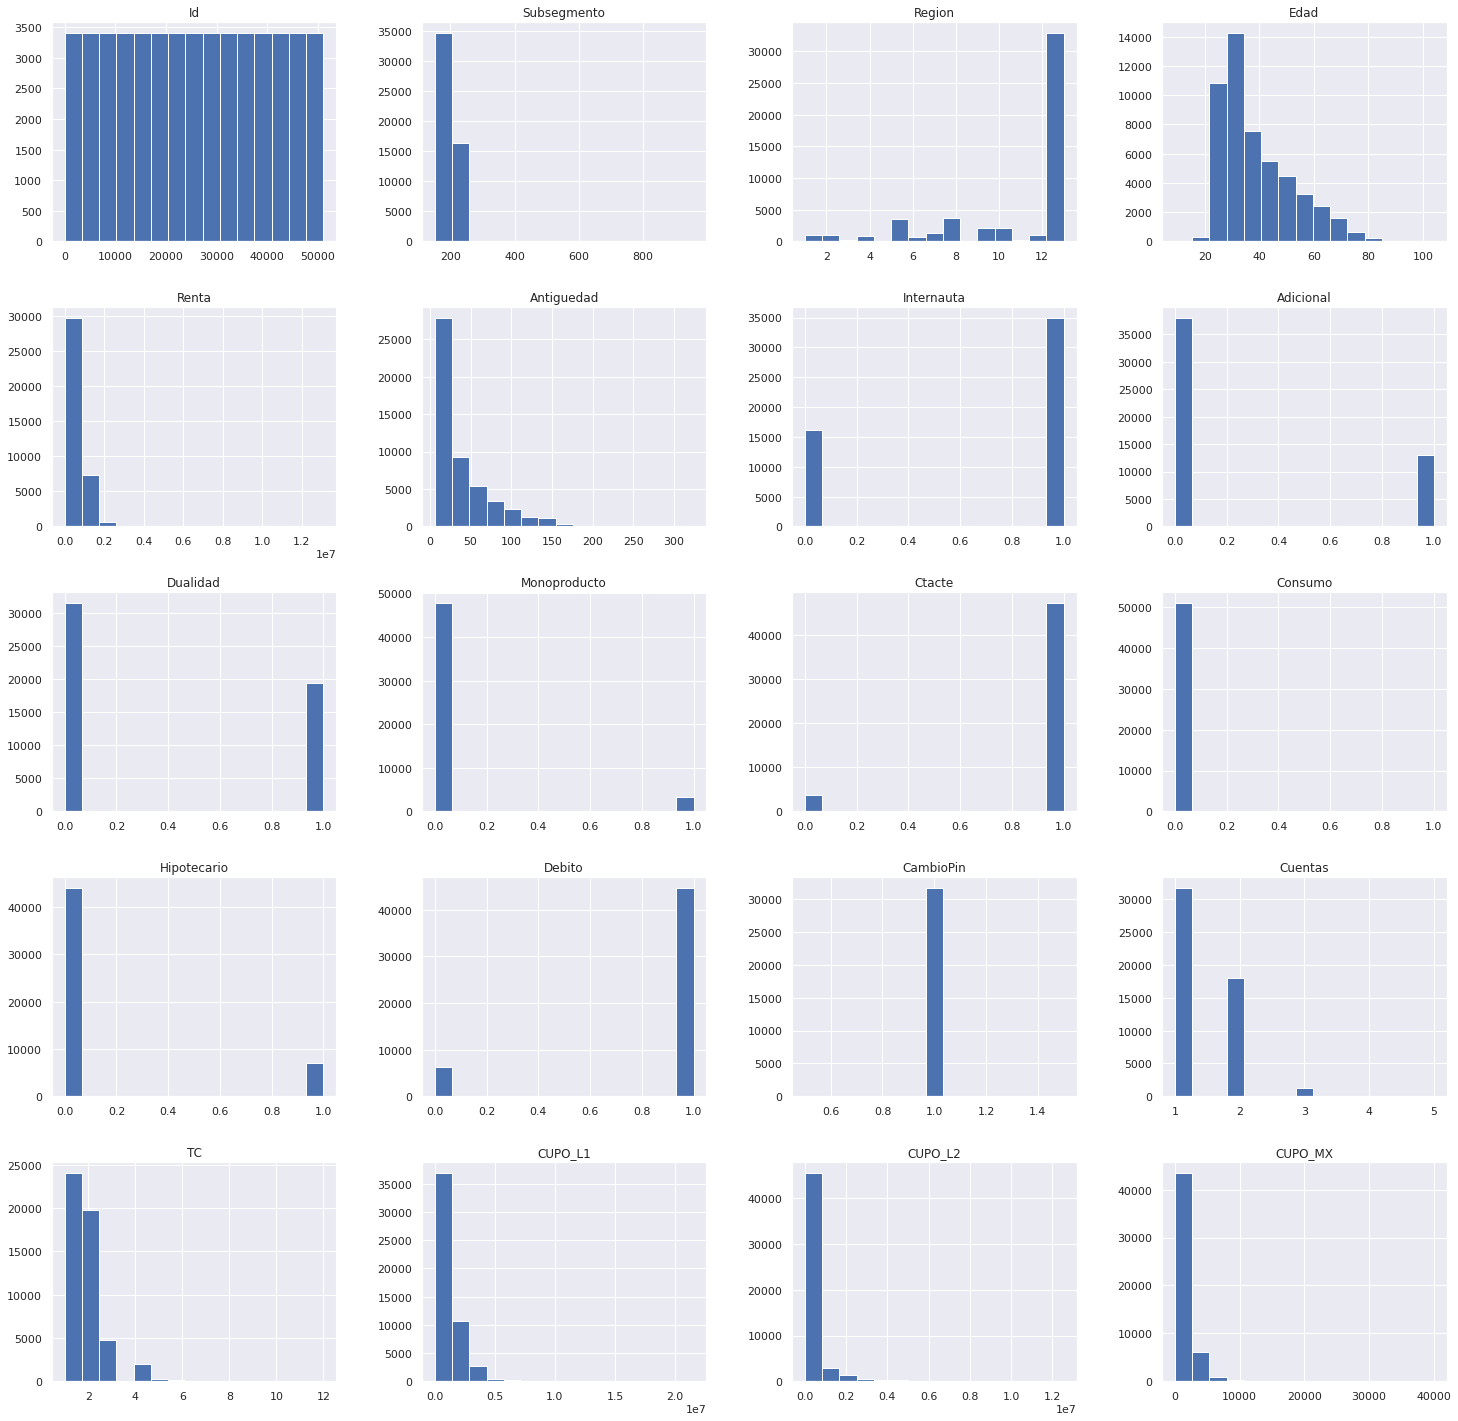

In [ ]:
analisis_muestra = clientes_monopoly.loc[:,'Id':'CUPO_MX']
analisis_muestra.hist(figsize=(25,25), bins = 15)

Primero que nada, se decide que la muestra a utilizar corresponde a las columnas desde Id hasta CUPO_MX. Esto es con el fin de poder encontrar alguna relación que se tenga con CUPO_L1, correspondiente a los cupos de las tarjetas de crédito para las compras nacionales.
Se grafican las variables numéricas de nuestra muestra con histogramas para poder visualizar la distribución de cada una de estas.

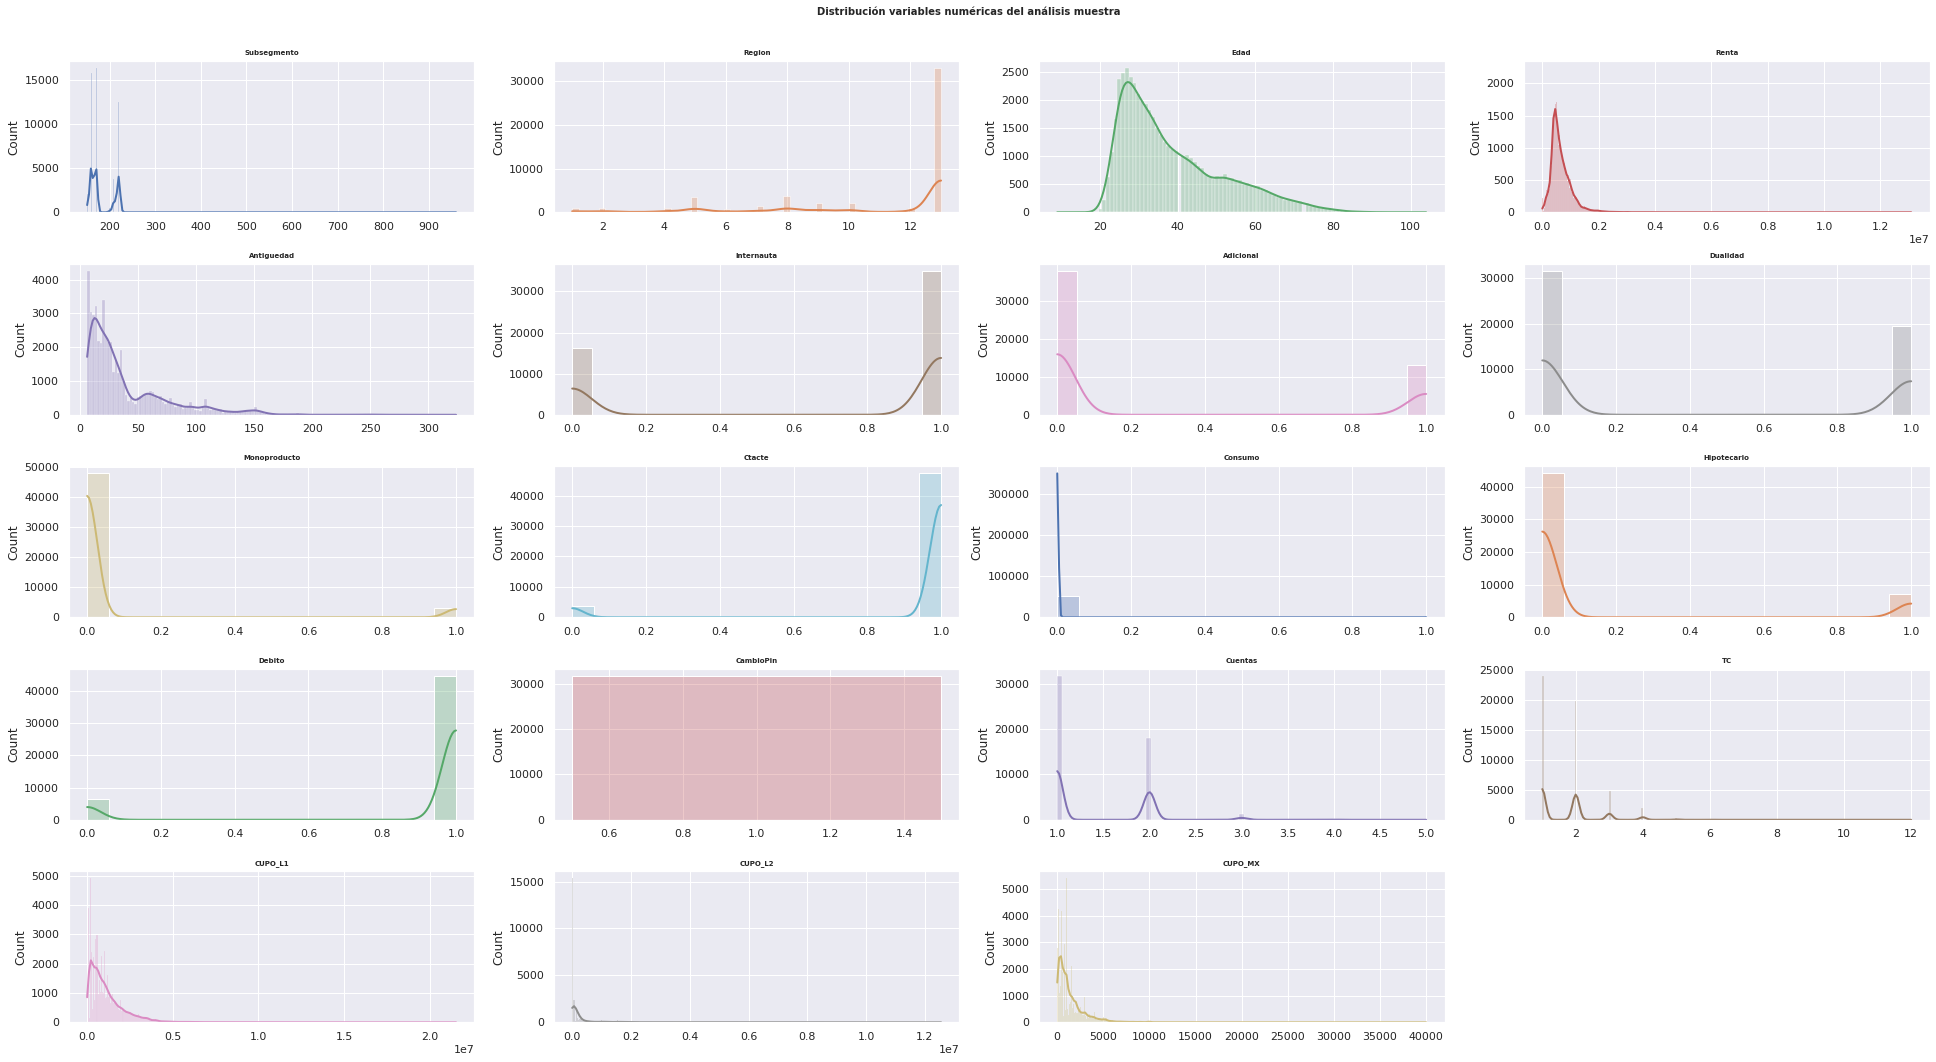

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(27, 15))
axes = axes.flat
columnas_numericas = analisis_muestra.select_dtypes(include=['float64', 'int']).columns
columnas_numericas = columnas_numericas.drop('Id')

for i, colum in enumerate(columnas_numericas):
    sns.histplot(
        data    = analisis_muestra,
        x       = colum,
        stat    = 'count',
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].set_xlabel("")

for i in [19]:
    fig.delaxes(axes[i])
fig.tight_layout()
fig.suptitle('Distribución variables numéricas del análisis muestra', fontsize = 10, fontweight = "bold");
plt.subplots_adjust(top = .93)

Sin embargo, complementando a la información previamente vista, se decidió utilizar histplot de Seaborn para obtener también una curva que indique un estimado de densidad para cada histograma. Además, se eliminó la columna Id ya que no proporcionaba ningún tipo de información relevante para continuar.

Cuando se crea un modelo es muy importante estudiar la distribución de los datos de la muestra que se sacó para identificar los predictores y la variable respuesta. Esto con el fin de poder obtener primeros vistazos del comportamiento de los datos, y así tener una idea general para proceder de manera más clara a la parte de preparación de los datos.

,Id,Subsegmento,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,CambioPin,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX
Id,1.000000,0.054252,-0.013686,0.332918,0.015980,0.145347,-0.155182,0.050817,-0.093430,0.084117,-0.077225,0.007348,-0.094288,-0.121160,NaN,-0.087143,-0.011324,0.077089,-0.007330,0.065492
Subsegmento,0.054252,1.000000,-0.047450,-0.519442,0.010060,-0.271497,0.207811,-0.159026,-0.140818,-0.157122,0.160693,-0.006287,-0.091344,0.210611,NaN,-0.135712,-0.193553,-0.289034,-0.114036,-0.210464
Region,-0.013686,-0.047450,1.000000,0.010729,-0.007266,0.046028,0.054414,0.097302,0.014180,0.047502,-0.047878,-0.001173,-0.002617,-0.030331,NaN,0.013041,0.069545,0.031714,0.028457,0.037012
Edad,0.332918,-0.519442,0.010729,1.000000,0.143001,0.524487,-0.389240,0.235544,0.013080,0.243881,-0.244444,0.005035,0.050220,-0.363856,NaN,0.019989,0.176350,0.443795,0.126141,0.352824
Renta,0.015980,0.010060,-0.007266,0.143001,1.000000,0.086308,0.000227,0.035191,0.015237,0.045551,-0.040247,0.031051,0.222307,-0.041375,NaN,0.022330,0.039249,0.289283,0.081081,0.275007
Antiguedad,0.145347,-0.271497,0.046028,0.524487,0.086308,1.000000,-0.186996,0.284226,-0.029773,0.230606,-0.236351,-0.002784,0.051725,-0.367517,NaN,-0.000185,0.193539,0.522510,0.137759,0.402881
Internauta,-0.155182,0.207811,0.054414,-0.389240,0.000227,-0.186996,1.000000,-0.051376,0.049976,-0.280042,0.293365,-0.002068,0.068627,0.270448,NaN,0.048808,-0.004690,-0.118996,-0.009930,-0.081926
Adicional,0.050817,-0.159026,0.097302,0.235544,0.035191,0.284226,-0.051376,1.000000,0.042667,0.064676,-0.066647,-0.002667,0.046905,-0.132583,NaN,0.049081,0.662240,0.201825,0.066254,0.163346
Dualidad,-0.093430,-0.140818,0.014180,0.013080,0.015237,-0.029773,0.049976,0.042667,1.000000,-0.145209,0.153923,-0.000728,0.067156,0.132060,NaN,0.942404,0.662013,0.310016,0.097764,0.280539
Monoproducto,0.084117,-0.157122,0.047502,0.243881,0.045551,0.230606,-0.280042,0.064676,-0.145209,1.000000,-0.913425,-0.007791,-0.103676,-0.687749,NaN,-0.141669,-0.051428,0.088935,-0.014826,0.047312


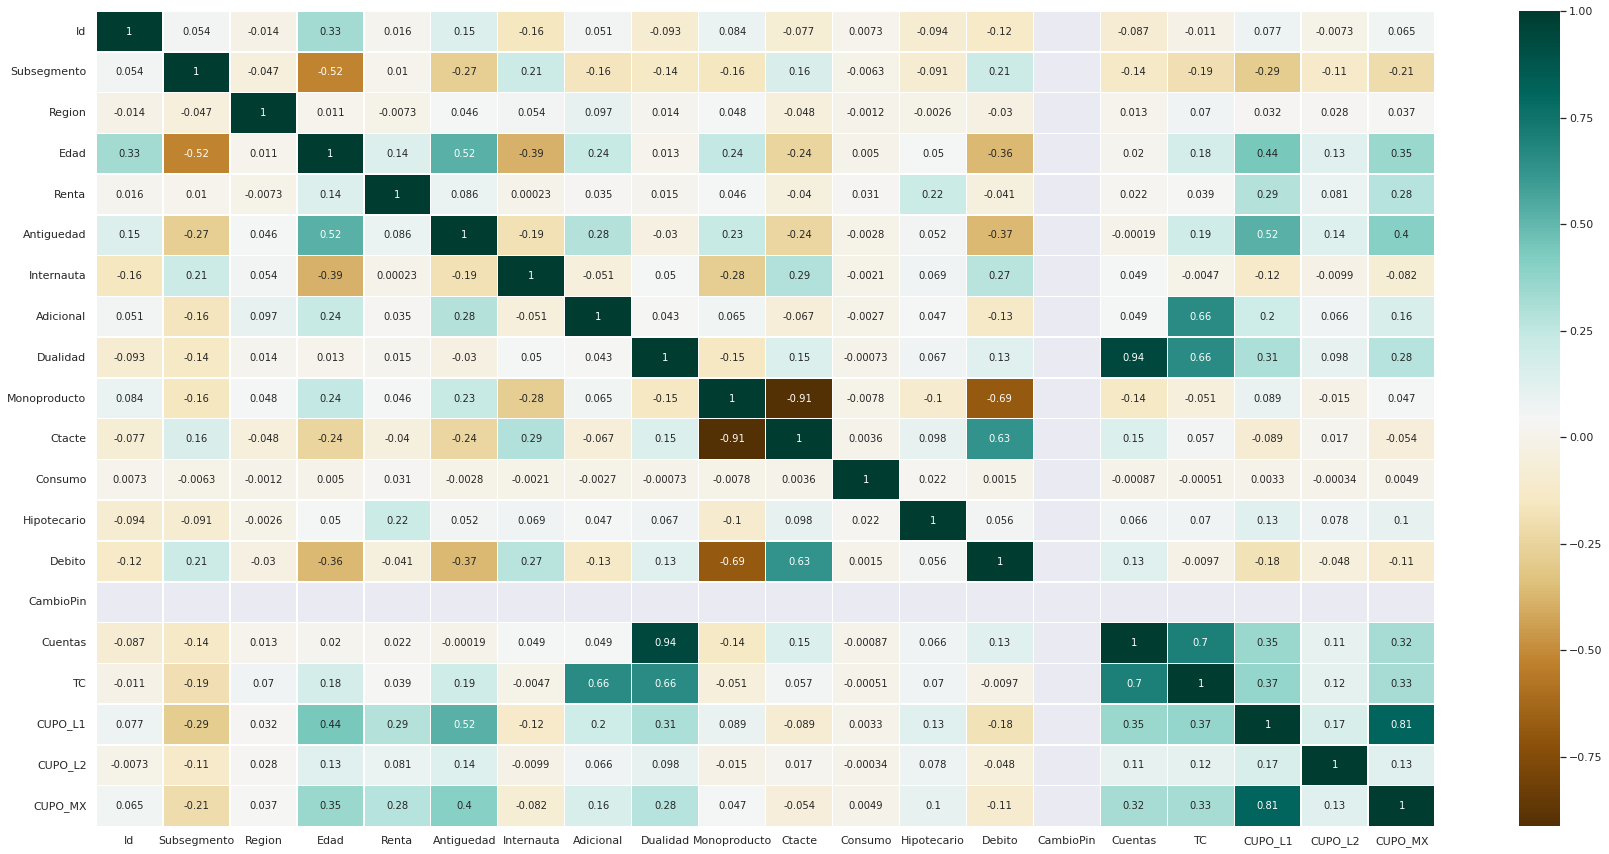

In [ ]:
#Relaciones entre las columnas del DataFrame
plt.figure(figsize=(30, 15))
corr_muestra = analisis_muestra.corr()
sns.heatmap(corr_muestra, cmap="BrBG", annot=True, linewidths=.5)
corr_muestra

Es importante estudiar la correlación entre las variables de la muestra que se va a estudiar ya que desde aquí se sacarán los predictores de nuestros futuros modelos. Es por esto que queremos pasar todas las variables de estudio a una matriz de correlación. Es aquí donde evaluaremos cómo se comportan entre ellas y estimaremos que variables son adecuadas para predecir nuestra respuesta (CUPO_L1), ¿Qué criterios utilizaremos?, según hemos aprendido algunos modelos se ven afectados si los predictores que se le entregan están altamente correlacionados entre ellos, por esta razón nos parece adecuado estimar en una correlación directa valores de los predictores entre 50 hasta 90, en una correlación inversa de -50 a -90.

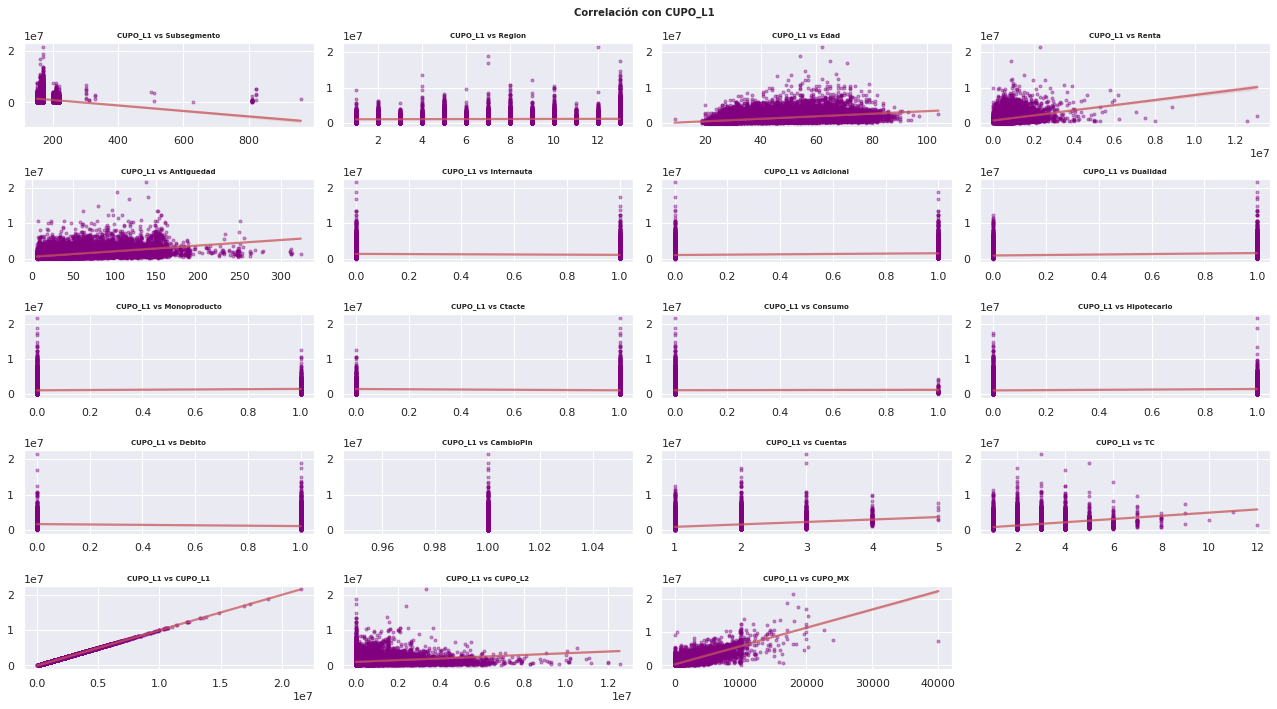

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(18, 10))
axes = axes.flat
columnas_numericas = analisis_muestra.select_dtypes(include=['float64', 'int']).columns
columnas_numericas = columnas_numericas.drop('Id')

for i, colum in enumerate(columnas_numericas):
    sns.regplot(
        x           = analisis_muestra[colum],
        y           = analisis_muestra['CUPO_L1'],
        color       = "purple",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"CUPO_L1 vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for i in [19]:
    fig.delaxes(axes[i])

fig.tight_layout()
fig.suptitle('Correlación con CUPO_L1', fontsize = 10, fontweight = "bold");
plt.subplots_adjust(top = .93)

Como se sabe, el objetivo del estudio es poder predecir el cupo nacional de los clientes del banco (CUPO_L1), y como anteriormente se vio el análisis de cada variable también se hace en relación a la variable respuesta. Analizando de esta manera, podemos ir formando una idea más clara de cómo se distribuyen los datos en relación a CUPO_L1 e identificar algún tipo de modelo que podría adecuarse a ciertos predictores, como por ejemplo, ‘CUPO_MX’ como predictor de ‘CUPO_L1’ podría usarse un modelo de regresión lineal simple. De esta manera se evaluará cada variable y a que modelo en particular podrían ajustarse una o más variables.

## 2.4 Análisis de las variables cualitativas.

Text(0.5, 0, 'Cantidad total')

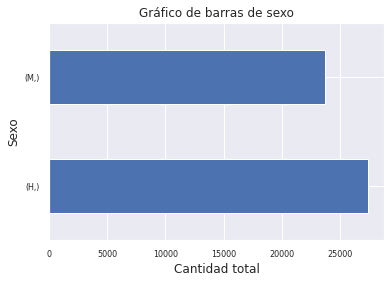

In [ ]:
columnas_object = analisis_muestra.select_dtypes(include=['object']).columns

analisis_muestra[columnas_object].value_counts().plot.barh()
plt.title('Gráfico de barras de sexo')
plt.tick_params(labelsize = 8)
plt.xlabel("Cantidad total")

En cuanto a variables cualitativas, anteriormente se contemplo que solamente hay una variable, con esta se decidió realizar un análisis sobre la variable Sexo, la cual se conforma de H = Hombre y M = Mujer. Con esto queremos ver cómo están divididos los datos, ver cuál tiene mayor cantidad de registros para posteriormente escoger la forma de imputación más adecuada si se encuentran datos nulos.

##2.5 Análisis de datos nulos y duplicados.

En cuanto a datos nulos y duplicados, antes de realizar alguna acción sobre ellos (ya sea eliminarlos o imputarlos) se debe de realizar un análisis, saber cuales y cuantos de estos datos contamos dentro de la base de datos la cual estamos trabajando, para una vez tener el conocimiento de estos, decidir qué acciones tomar sobre ellos. Es por ello, que se utilizaron las funciones que se verán a continuación.

In [ ]:
#filas con información duplicada
filas_duplicadas = analisis_muestra[analisis_muestra.duplicated()]
print('Cantida de filas duplicadas:', filas_duplicadas.shape)

Cantida de filas duplicadas: (0, 21)


In [ ]:
analisis_muestra.count()

Id              51124
Subsegmento     51124
Sexo            51123
Region          51071
Edad            51124
Renta           37759
Antiguedad      51124
Internauta      51124
Adicional       51124
Dualidad        51124
Monoproducto    51124
Ctacte          51124
Consumo         51124
Hipotecario     51124
Debito          51124
CambioPin       31736
Cuentas         51124
TC              51124
CUPO_L1         51124
CUPO_L2         51124
CUPO_MX         51124
dtype: int64

In [ ]:
analisis_muestra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            51124 non-null  int64  
 1   Subsegmento   51124 non-null  int64  
 2   Sexo          51123 non-null  object 
 3   Region        51071 non-null  float64
 4   Edad          51124 non-null  int64  
 5   Renta         37759 non-null  float64
 6   Antiguedad    51124 non-null  int64  
 7   Internauta    51124 non-null  int64  
 8   Adicional     51124 non-null  int64  
 9   Dualidad      51124 non-null  int64  
 10  Monoproducto  51124 non-null  int64  
 11  Ctacte        51124 non-null  int64  
 12  Consumo       51124 non-null  int64  
 13  Hipotecario   51124 non-null  int64  
 14  Debito        51124 non-null  int64  
 15  CambioPin     31736 non-null  float64
 16  Cuentas       51124 non-null  int64  
 17  TC            51124 non-null  int64  
 18  CUPO_L1       51124 non-nu

In [ ]:
#Buscando los datos nulos de la muestra
print(analisis_muestra.isnull().sum())

Id                  0
Subsegmento         0
Sexo                1
Region             53
Edad                0
Renta           13365
Antiguedad          0
Internauta          0
Adicional           0
Dualidad            0
Monoproducto        0
Ctacte              0
Consumo             0
Hipotecario         0
Debito              0
CambioPin       19388
Cuentas             0
TC                  0
CUPO_L1             0
CUPO_L2             0
CUPO_MX             0
dtype: int64


Este paso resulta de vital importancia ya que la gran mayoría de los algoritmos no aceptan datos perdidos, y poder identificarlos con certeza será de gran ayuda al momento del proceso de tratamiento de estos mismos.

#3) Data Preparation

##3.1 Reformulación y extracción de atributos del conjunto de datos. 

In [ ]:
#Cambiar los nombres de las columnas a unas más entendibles.
analisis_muestra = analisis_muestra.rename(columns={'Internauta' : 'Usuario_Web', 'Adicional' : 'TC_Adicional', 'Dualidad' : 'TC_Dualidad',
                                                    'Monoproducto' : 'TC_Unica', 'Ctacte' : 'Cta_Corriente', 'Consumo': 'Cto_Consumo', 
                                                    'Hipotecario' : 'Cto_Hipotecario', 'Debito' : 'T_Debito', 'TC':'T_Credito', 'CUPO_L1' : 'CUPO_NAC',
                                                    'CUPO_L2' : 'CUPO_CUOT','CUPO_MX' : 'CUPO_INTERNAC'})
analisis_muestra.head(10)

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Usuario_Web,TC_Adicional,TC_Dualidad,TC_Unica,Cta_Corriente,Cto_Consumo,Cto_Hipotecario,T_Debito,CambioPin,Cuentas,T_Credito,CUPO_NAC,CUPO_CUOT,CUPO_INTERNAC
0,1,160,M,13.0,43,NaN,130,1,1,0,0,1,0,0,1,NaN,1,3,798000,1012000.0,1210.0
1,2,160,H,13.0,46,143640.0,69,1,0,0,0,1,0,1,0,NaN,1,1,750000,150000.0,1000.0
2,3,170,H,13.0,45,929106.0,24,1,1,0,0,1,0,1,1,1.0,1,2,1350000,200000.0,1500.0
3,4,151,H,13.0,46,172447.0,134,0,1,0,1,0,0,0,0,1.0,1,2,1570800,220001.0,0.0
4,5,170,H,13.0,46,805250.0,116,0,1,1,0,1,0,1,0,1.0,2,3,2762000,2.0,6430.0
5,6,170,H,13.0,47,707664.0,67,1,1,0,0,1,0,0,1,1.0,1,2,1312500,450000.0,714.0
6,7,811,H,13.0,48,1022833.0,21,1,0,1,0,1,0,0,1,1.0,2,2,813000,160000.0,600.0
7,8,170,H,13.0,46,NaN,69,0,1,1,0,1,0,0,1,NaN,2,3,1242000,1738000.0,1255.0
8,9,170,H,13.0,49,1171066.0,33,0,0,0,0,1,0,0,1,1.0,1,1,1996400,1.0,2000.0
9,10,170,M,13.0,44,964387.0,23,1,1,0,0,1,0,1,1,1.0,1,3,672000,3500000.0,1000.0


Desde aquí en adelante es importante comprender bien la estructura de los datos, y para esto, se ha decidido reformular las columnas con nombres que representan de mejor manera los datos que contienen; ya que es una muestra la que se está utilizando, no afectaría a la estructura original de la base de datos, y por su parte ayuda a esclarecer mucho más los siguientes procesos.

##3.2 Tratamiento de datos nulos.

Como anteriormente se realizó el análisis de los datos nulos presentes en la base de datos, ahora es cuando deben de tratarse. Para esto tenemos varias opciones:
- Eliminar los datos perdidos o duplicados.
- Trabajar con estos valores.
- Tratar de estimar los valores ausentes utilizando el resto del conjunto de datos.


In [ ]:
def simpleImputer(column, data_fill):
  analisis_muestra[column] = analisis_muestra[column].fillna(data_fill)
  return print("\033[4;32m"+'imputación realizada con éxito. DataFrame Actualizado!')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba34f52110>]],
      dtype=object)

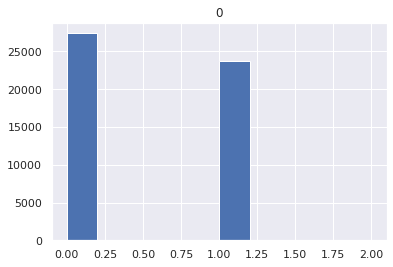

In [ ]:
#Limpiando los datos de sexo (simpleimputer)
le = preprocessing.LabelEncoder()
muestra_sexo = analisis_muestra['Sexo'].replace(np.nan, 'none', regex=True)#.replace porque requerimos de string o number para el label encoder.

muestra_sexo_le = le.fit_transform(muestra_sexo)

pd.DataFrame(muestra_sexo_le).hist()


In [ ]:
simpleImputer('Sexo', 'H')

imputación realizada con éxito. DataFrame Actualizado!


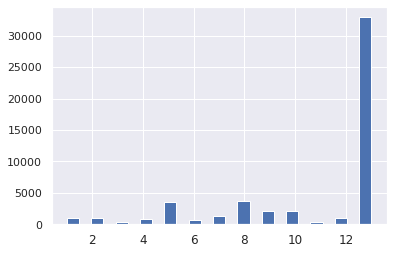

In [ ]:
#Region (simpleimputer)
analisis_muestra['Region'].hist(xlabelsize=12, bins=25)

In [ ]:
simpleImputer('Region', 13.0)

imputación realizada con éxito. DataFrame Actualizado!


In [ ]:
#renta (iterativeimputer)
imputer = KNNImputer(n_neighbors=3, weights="uniform")

array_renta_knn = imputer.fit_transform(analisis_muestra[['Id','Renta']])
df_renta_knn = pd.DataFrame(array_renta_knn)
df_renta_knn.columns = ['Id','Renta']
analisis_muestra['Renta'] = df_renta_knn['Renta']
print("\033[4;32m"+'DataFrame Actualizado!')


DataFrame Actualizado!


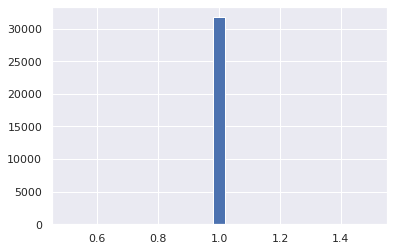

In [ ]:
#cambiopin
analisis_muestra['CambioPin'].hist(bins=25)

In [ ]:
simpleImputer('CambioPin', 1.0)

imputación realizada con éxito. DataFrame Actualizado!


In [ ]:
#Buscando los datos nulos de la muestra
print(analisis_muestra.isnull().sum())

Id                 0
Subsegmento        0
Sexo               0
Region             0
Edad               0
Renta              0
Antiguedad         0
Usuario_Web        0
TC_Adicional       0
TC_Dualidad        0
TC_Unica           0
Cta_Corriente      0
Cto_Consumo        0
Cto_Hipotecario    0
T_Debito           0
CambioPin          0
Cuentas            0
T_Credito          0
CUPO_NAC           0
CUPO_CUOT          0
CUPO_INTERNAC      0
dtype: int64


Las primeras dos opciones, aunque son sencillas, supondría perder información que podría resultar relevante para el banco. En el caso de eliminar variables, el impacto dependerá de cuanta información sea y qué valor aportan al modelo. Trabajar con los datos nulos, supone posibles errores en algunos algoritmos. Cuando se emplea la imputación, es muy importante tener en cuenta el riesgo que corremos al introducir valores estimados en campos que posiblemente sean predictores y representen mucha influencia en el modelo.

Por estos motivos se ha decidido no optar por las primeras dos opciones, sino, que vamos a imputar los valores que están perdidos, ya que no corremos mucho riesgo después del análisis que hicimos en el punto 2. Pero con fines didácticos representaremos cada propiedad de forma individual (aunque ya se vió anteriormente en el punto 2).

##3.3 Tratamiento de OutLiers.

In [ ]:
def deleteOutliers(column_name, number):
  global analisis_muestra
  outliers =analisis_muestra[analisis_muestra[column_name] >= number].index
  analisis_muestra = analisis_muestra.drop(outliers)
  return print("\033[4;32m"+'OutLier(s) eliminado(s). DataFrame Actualizado!')

Para el caso de los Outliers, primeramente se debe analizar los valores atípicos presentes en los datos, para esto se utilizó boxplot, ya que nos permite representar de manera gráfica la serie de datos que estamos trabajando y así escoger cuales son los datos los cuales afectan al estudio del negocio, para posteriormente excluirlos, de esta forma se podrá obtener un análisis de datos más preciso. ¿Con qué criterios queremos eliminar los outliers? solo serán eliminados los más dispersos.

A continuación también queremos graficar cada una de las variables que presentaron datos nulos en el análisis anterior. ¿Como? utilizaremos los diagramas de caja y bigotes, con estos queremos ver distribuidos sus datos en cuartiles, pero ojo, los datos que están precisamente entre los bigotes exteriores (o extremos) no nos interesan en este caso, pues estarían dentro del rango de la media de los datos distribuidos, a nosotros en concreto nos interesan los datos que están por fuera del 50% central de la distribución, ya que, estos los tomaremos como outliers del conjunto de datos, aunque, no los trataremos todos.

También, para encontrar el index de los outliers identificados, imprimimos la variable, ordenando la lista de manera ascendente o descendente dependiendo de donde se hallen los registros. El valor de los datos se pasará a una función, y esta se encargará de eliminar los datos.

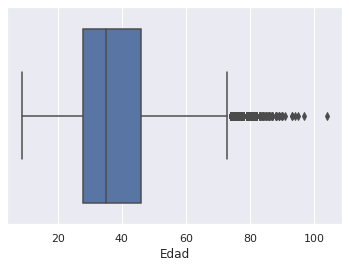

In [ ]:
#outliers Edad
sns.boxplot(x=analisis_muestra['Edad'])

In [ ]:
analisis_muestra['Edad'].sort_values(ascending= False)

35001    104
7295      97
7317      95
39516     94
40115     93
        ... 
38700     19
38727     19
34107     19
34159     19
35823      9
Name: Edad, Length: 51124, dtype: int64

In [ ]:
deleteOutliers('Edad', 104)

OutLier(s) eliminado(s). DataFrame Actualizado!


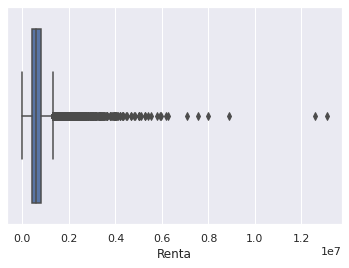

In [ ]:
#outliers Renta
sns.boxplot(x=analisis_muestra['Renta'])

In [ ]:
analisis_muestra['Renta'].sort_values(ascending= False)

43983    13089327.0
42780    12566667.0
49248     8870997.0
41236     8000000.0
48422     7529691.0
            ...    
7780            1.0
26823           1.0
4914            1.0
42994           1.0
24027           1.0
Name: Renta, Length: 51123, dtype: float64

In [ ]:
deleteOutliers('Renta', 12566667.0)

OutLier(s) eliminado(s). DataFrame Actualizado!


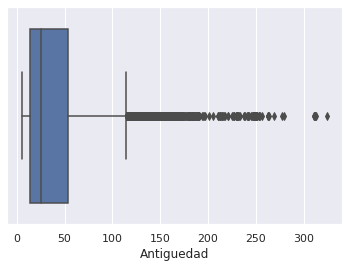

In [ ]:
#outliers Antiguedad
sns.boxplot(x=analisis_muestra['Antiguedad'])

In [ ]:
analisis_muestra['Antiguedad'].sort_values(ascending= False)

39994    324
39748    313
42596    312
49987    312
50328    312
        ... 
34977      6
38545      6
8063       6
38543      6
19204      6
Name: Antiguedad, Length: 51121, dtype: int64

In [ ]:
deleteOutliers('Antiguedad', 300)

OutLier(s) eliminado(s). DataFrame Actualizado!


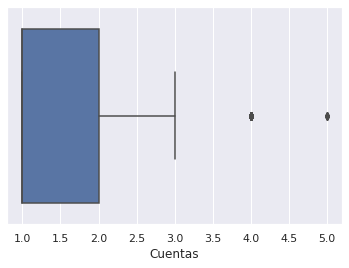

In [ ]:
#outliers cuentas
sns.boxplot(x=analisis_muestra['Cuentas'])

In [ ]:
analisis_muestra['Cuentas'].sort_values(ascending= False)

42349    5
42457    5
16453    5
16655    5
22154    5
        ..
31221    1
31220    1
31217    1
31216    1
0        1
Name: Cuentas, Length: 51114, dtype: int64

In [ ]:
deleteOutliers('Cuentas', 4)

OutLier(s) eliminado(s). DataFrame Actualizado!


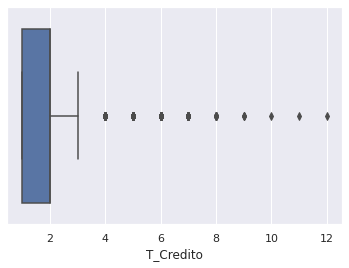

In [ ]:
#outliers T_Credito
sns.boxplot(x=analisis_muestra['T_Credito'])

In [ ]:
analisis_muestra['T_Credito'].sort_values(ascending= False)

2717     12
45663    11
39971    10
40070     9
44531     9
         ..
16551     1
16552     1
16553     1
38820     1
31249     1
Name: T_Credito, Length: 51005, dtype: int64

In [ ]:
deleteOutliers('T_Credito', 4)

OutLier(s) eliminado(s). DataFrame Actualizado!


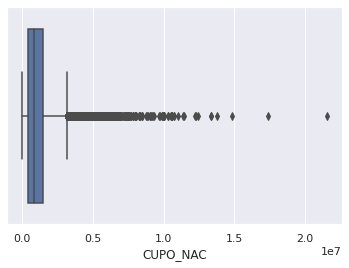

In [ ]:
#outliers
sns.boxplot(x=analisis_muestra['CUPO_NAC'])

In [ ]:
analisis_muestra['CUPO_NAC'].sort_values(ascending= False).head(20)

42797    21534000
41928    17400000
46672    14829000
41345    13800000
45750    13340000
776      13340000
43211    12402000
47873    12269260
47349    12243600
41400    11448000
46447    11340000
39252    10990000
48759    10740000
47308    10694780
48818    10600000
39893    10579000
16544    10500000
40299    10494000
39496    10494000
40506    10325000
Name: CUPO_NAC, dtype: int64

No se eliminaron OutLiers.

Aquí precisamente, no se eliminaron outliers, ¿Por qué? Bueno, este tema se tocará más adelante, pero en resumen, el conjunto de datos contiene cifras que son muy bajas, por ejemplo: 1, 2, 3, etc. Por lo que es normal que la media sea bastante baja y considere estos valores como outliers. Además, no queremos eliminar datos directamente del conjunto de la variable respuesta, porque afectará a la predicción del modelo.

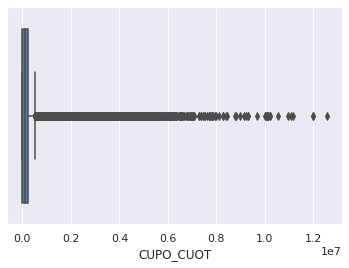

In [ ]:
#outliers
sns.boxplot(x=analisis_muestra['CUPO_CUOT'])

In [ ]:
analisis_muestra['CUPO_CUOT'].sort_values(ascending= False).head(40)

44611    12550000.0
831      12000000.0
46283    11990000.0
49352    11168000.0
45626    11080330.0
23146    10968072.0
22373    10530000.0
6779     10200000.0
47461    10192016.0
20294    10133737.0
42244    10125000.0
33038    10073923.0
45392    10043161.0
13594    10023252.0
41153    10019353.0
35984     9680000.0
12045     9310000.0
50614     9300000.0
45202     9214000.0
43895     9120000.0
11597     8968744.0
6488      8800000.0
46487     8750000.0
6715      8430000.0
22484     8393925.0
34138     8289573.0
27807     8280000.0
11172     8099000.0
14719     8000000.0
731       7930000.0
13090     7860000.0
47653     7850000.0
8833      7815000.0
48401     7765146.0
43111     7720001.0
27748     7700000.0
40829     7693000.0
15794     7630000.0
36227     7520000.0
7210      7500000.0
Name: CUPO_CUOT, dtype: float64

In [ ]:
deleteOutliers('CUPO_NAC', 11340000)

OutLier(s) eliminado(s). DataFrame Actualizado!


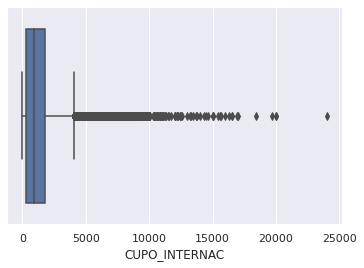

In [ ]:
#outliers
sns.boxplot(x=analisis_muestra['CUPO_INTERNAC'])

In [ ]:
analisis_muestra['CUPO_INTERNAC'].sort_values(ascending= False)

41565    20000.0
5183     20000.0
39947    19680.0
47007    18450.0
48818    17000.0
          ...   
2300         0.0
48909        0.0
42000        0.0
48915        0.0
11660        0.0
Name: CUPO_INTERNAC, Length: 48643, dtype: float64

In [65]:
deleteOutliers('CUPO_INTERNAC', 24000.0)

OutLier(s) eliminado(s). DataFrame Actualizado!


Cabe resaltar que, en los diagramas de caja y bigotes, no buscamos eliminar todos los datos atípicos, ya que sería eliminar una gran cantidad de datos que afectaron al modelo. La mayoría de estos datos se consideran atípicos porque las columnas contienen valores muy bajos en su mayoría, y al igual que en la imputación, no queremos afectar datos de la muestra que ya son potencialmente representativos para el modelo.

##3.4 Eliminar columnas con varianza 0 o proximas a 0.

In [ ]:
le = preprocessing.LabelEncoder()
sexo_label = data_categorica_trans = le.fit_transform(analisis_muestra['Sexo'].replace(np.nan, 'none', regex=True))
analisis_muestra['Sexo'] = sexo_label
analisis_muestra['Sexo']

0        1
1        0
2        0
3        0
4        0
        ..
51119    0
51120    0
51121    0
51122    1
51123    0
Name: Sexo, Length: 48643, dtype: int64

A los modelos que queremos implementar queremos entregarle variables que resulten representativas para el estudio, es decir no incluir predictores que posean cero varianza, ya que estos no aportan información real para el estudio. Tampoco resultaría conveniente dejarlas ya que en la práctica podrían resultar contraproducentes, ya que con la poca cantidad de variedad de datos podría alterar el resultado de nuestra predicción. Es importante realizarlo antes de la estandarización, ya que luego todos los predictores tendrán varianza 1 y la clase a utilizar VarianceThreshold eliminaría todo.

In [ ]:
selector = VarianceThreshold(threshold=0)
selected_columns = selector.fit_transform(analisis_muestra)

columns_names = analisis_muestra.columns.drop('CambioPin') 

filtro_var = pd.DataFrame(selected_columns, columns = columns_names)
filtro_var

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Usuario_Web,TC_Adicional,TC_Dualidad,TC_Unica,Cta_Corriente,Cto_Consumo,Cto_Hipotecario,T_Debito,Cuentas,T_Credito,CUPO_NAC,CUPO_CUOT,CUPO_INTERNAC
0,1.0,160.0,1.0,13.0,43.0,415064.333333,130.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,3.0,798000.0,1012000.0,1210.0
1,2.0,160.0,0.0,13.0,46.0,143640.000000,69.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,750000.0,150000.0,1000.0
2,3.0,170.0,0.0,13.0,45.0,929106.000000,24.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,1350000.0,200000.0,1500.0
3,4.0,151.0,0.0,13.0,46.0,172447.000000,134.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1570800.0,220001.0,0.0
4,5.0,170.0,0.0,13.0,46.0,805250.000000,116.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,3.0,2762000.0,2.0,6430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48638,51120.0,160.0,0.0,13.0,51.0,364978.000000,57.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,3.0,999000.0,1000.0,550.0
48639,51121.0,170.0,0.0,13.0,51.0,625376.000000,39.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1744200.0,1.0,300.0
48640,51122.0,160.0,0.0,13.0,47.0,806220.000000,153.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,1061000.0,194700.0,1526.0
48641,51123.0,160.0,1.0,13.0,47.0,757491.333333,11.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1612000.0,300000.0,2300.0


##3.5 Filtrar los datos más correlacionados con la variable prueba.

In [ ]:
filtro_corr = filtro_var[['Antiguedad','Edad','CUPO_INTERNAC']]
filtro_corr

,Antiguedad,Edad,CUPO_INTERNAC
0,130.0,43.0,1210.0
1,69.0,46.0,1000.0
2,24.0,45.0,1500.0
3,134.0,46.0,0.0
4,116.0,46.0,6430.0
...,...,...,...
48638,57.0,51.0,550.0
48639,39.0,51.0,300.0
48640,153.0,47.0,1526.0
48641,11.0,47.0,2300.0


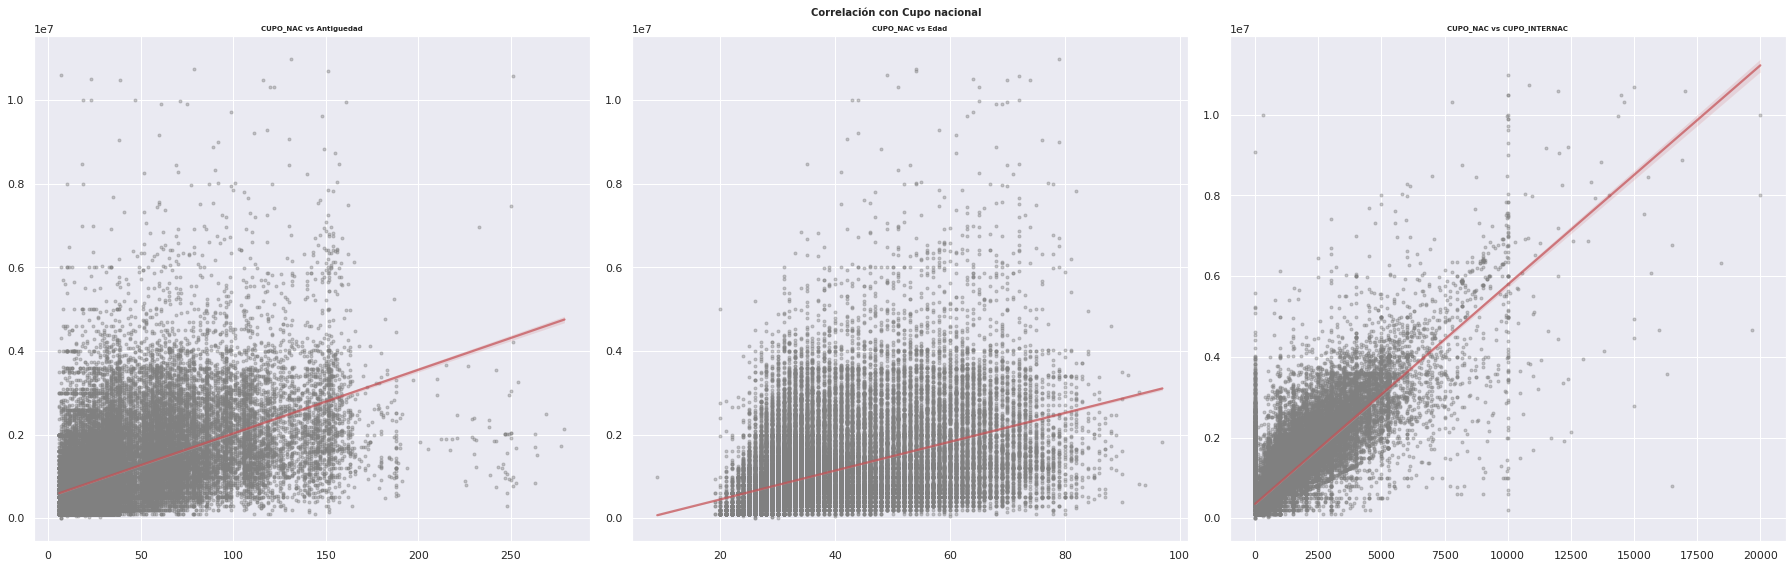

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))
axes = axes.flat

for i, colum in enumerate(filtro_corr.columns):
    sns.regplot(
        x           = filtro_corr[colum],
        y           = filtro_var['CUPO_NAC'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"CUPO_NAC vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

fig.tight_layout()
fig.suptitle('Correlación con Cupo nacional', fontsize = 10, fontweight = "bold");
plt.subplots_adjust(top = .93)

(Este gráfico lo hicimos con el propósito de representar la distribución de los tres predictores, y ver su distribución, de esta manera podremos ver cómo se relacionan estos con la variable respuesta, y tener una visión mucho más clara del modelo de regresión que utilizaremos)

Como sabemos el modelo principalmente se dividirá entre variables que son independientes y dependientes. Las independientes son las que no las influencia un agente externo, y la dependiente si lo son. Una buena forma de identificar estas variables es buscar la variable respuesta(la que será precedida) en una matriz de correlación y evaluar los atributos más relacionados (sea indirecta o directamente). Esto visto en el punto 2.3. Las columnas filtradas serán utilizadas de predictores en el modelo.

#4) Modeling y Evaluación

##4.1 División Train - Test y escalamiento de los datos de entrenamiento.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    filtro_corr,
    filtro_var['CUPO_NAC'],
    test_size   = 0.2,
    random_state = 123,
    shuffle      = True
)
std = StandardScaler()
x_train = std.fit_transform(x_train)

x_test = std.transform(x_test)

Evaluar la capacidad de predecir de un modelo consiste en poder comprobar que tanto se acercan sus predicciones de los verdaderos valores de la variable respuesta. Para esto se necesita disponer de un conjunto de datos de los  que se conozca la variable respuesta, pero que no formen parte del modelo, es decir, que no hayan participado en el ajuste. Es por esto que para el modelo los datos se dividen en un conjunto de entrenamiento y test. El tamaño que nosotros estimamos adecuado es de 80% - 20%, ya que por la cantidad de registros creemos que este dará buenos resultados. El reparto además se hará de forma aleatoria.

Además, queremos estandarizar los datos que formarán parte de los predictores, ya que, como son numéricos, la escala en la que se miden, así como la magnitud de su varianza pueden influir a ciertos modelos. Ya que, muchos de los algoritmos de machine learning (SVM, Lasso, etc...) son más sensibles a esto. Esto debido a que si no se iguala la magnitud de los predictores, aquellos que se midan en una mayor escala, o tengan una mayor varianza van a dominar el modelo, aunque sean los que menor relación tienen con la variable respuesta.

## 4.2 Entrenamiento y predicción de datos con regresión lineal.

En esta sección se ajustará y predecirá tres modelos de regresión. Cada uno será entrenado con los mismos predictores, ya que son las variables más relacionadas a la respuesta. Los tres modelos que utilizaremos será el de regresión lineal múltiple, regresión polinomial y bosque aleatorio regresión. Queremos probar estos tres para ver cuál se ajusta mejor a nuestro modelo. a primera vista creemos que por la densidad de datos, es complejo que la regresión lineal nos arroje un buen resultado y la polinomial también, el que más probabilidad tiene de arrojar una predicción más acertada es el bosque aleatorio ya que este no depende de la distribución de los datos.

Una vez hayamos entrenado los modelos queremos predecir nuestra variable respuesta y cuanto porcentaje de los datos puede ser explicado por el modelo.

In [69]:
lr = linear_model.LinearRegression()

lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

print('')
print('Valor de la pendiente:')
print(lr.coef_)
print('')
print('Valor de la intersección:')
print(lr.intercept_)
print('')
print('Error cuadratico medio:')
print('%.2f' % mean_squared_error(y_test, y_pred))
print('')
print('Error absoluto medio:')
print('%.2f' % mean_absolute_error(y_test, y_pred))
print('')
print('Precisión del modelo:')
print('%.2f' % lr.score(x_train, y_train))


Valor de la pendiente:
[194584.24913919 107354.94036871 701167.34229946]

Valor de la intersección:
1088207.8133576605

Error cuadratico medio:
296395309891.36

Error absoluto medio:
352878.96

Precisión del modelo:
0.70


## 4.3 Entrenamiento y predicción de datos con regresión polinomial.

In [68]:
from sklearn.preprocessing import PolynomialFeatures

reg_poli = PolynomialFeatures(degree=2)

x_train_poli = reg_poli.fit_transform(x_train)
x_test_poli = reg_poli.fit_transform(x_test)

lr.fit(x_train_poli, y_train)

y_pred_poli = lr.predict(x_test_poli)

print('')
print('Valor de la pendiente:')
print(lr.coef_)
print('')
print('Valor de la intersección:')
print(lr.intercept_)
print('')
print('Error cuadratico medio:')
print('%.2f' % mean_squared_error(y_test, y_pred_poli))
print('')
print('Error absoluto medio:')
print('%.2f' % mean_absolute_error(y_test, y_pred_poli))
print('')
print('Precisión del modelo:')
print('%.2f' % lr.score(x_train_poli, y_train))



Valor de la pendiente:
[     0.         217275.21797798 153713.57600765 778966.47552197
 -12396.0057058   31984.04703356 -88816.0212634  -67136.87450564
  16468.03152788  -5005.27355289]

Valor de la intersección:
1185508.8304972462

Error cuadratico medio:
276166293116.62

Error absoluto medio:
332409.96

Precisión del modelo:
0.72


## 4.4 Entrenamiento y predicción de datos con Random Forest Regression.

In [70]:
from sklearn.ensemble import RandomForestRegressor

bar = RandomForestRegressor(n_estimators=300, max_depth=20)
bar.fit(x_train, y_train)

bar_pred = bar.predict(x_test)

print('')
print('Error cuadratico medio:')
print('%.2f' % mean_squared_error(y_test, bar_pred))
print('')
print('Error absoluto medio:')
print('%.2f' % mean_absolute_error(y_test, bar_pred))
print('')
print('Precisión del modelo:')
print('%.2f' % bar.score(x_train, y_train))



Error cuadratico medio:
275947987703.31

Error absoluto medio:
320130.85

Precisión del modelo:
0.94


#5) Conclusión

En el punto dos de entendimiento de los datos, pudimos ver que el target es una variable numérica continua, y las métricas representan que el resultado de las predicciones no son nada malas. Estas nos dan la idea general de que la precisión del modelo, contrastando los datos reales y predichos. Por ejemplo, el error cuadrático medio por lo general esta sobre los 200 mil millones es bueno si tomamos en cuenta lo anterior, es decir, que el target es dinero, llegando a sobrepasar en algunos registros los 10 millones. De esto ya podemos inferir que el valor medio de los cuadrados de la diferencia entre los valores predichos y los valores reales es aceptable y que las predicciones son buenas, viéndose esto reflejado en que, la regresión lineal y polinomial, estuvieron por encima del 70% y el árbol de regresión esta por encima del 90%.

Como pudimos observar, la mayor cantidad de datos predichos es explicado por el modelo de bosque aleatorio regresión. Al inicio se planteó la hipótesis de que este sería el que mayor índice de asertividad tendría. Ya que es un algoritmo simple y flexible, ya que se puede utilizar tanto para regresión como para clasificación. Además, su método para predecir es mucho más sólido a nuestra vista, ya que como sabemos, este crea un conjunto de árboles de decisión aleatorios y los combina para obtener más precisión y estabilidad. Nos resulta además la mejor técnica ya que, este no busca la característica más importante al dividir un nodo, sino que busca la mejor característica dentro de un subconjunto aleatorio de características, lo que da como resultado una gran diversidad de características que usualmente dan mejor resultado.

Para resumir, nosotros preferimos el algoritmo de regresión bosque aleatorio. Independientemente de la predicción, la preferimos ya que es más flexible, estable y no tan rígida. Además, al momento de entregarle predictores y este selecciona la característica más importantes de un subconjunto de características.
